# Логистическая регрессия

✍ Ранее мы обсуждали модель линейной регрессии, которая предназначена для решения задачи регрессии. Теперь нам предстоит разобраться с тем, как преобразовать данную модель, чтобы она решала задачу классификации.

**Для начала вспомним, что такое классификация.**

**Задача классификации (classification)** — задача, в которой мы пытаемся предсказать класс объекта на основе признаков в наборе данных. То есть задача сводится к предсказанию целевого признака, который является **категориальным.**

Когда классов, которые мы хотим предсказать, только два, классификация называется **бинарной**. Например, мы можем предсказать, болен ли пациент раком, является ли изображение человеческим лицом, является ли письмо спамом и т. д.

Когда классов, которые мы хотим предсказать, более двух, классификация называется **мультиклассовой (многоклассовой)**. Например, предсказание модели самолёта по радиолокационным снимкам, классификация животных на фотографиях, определение языка, на котором говорит пользователь, разделение писем на группы.

Для простоты мы пока разберёмся с бинарной классификацией, а в следующем юните обобщим результат на мультиклассовую.

Что вообще означает «решить задачу классификации»? Это значит построить разделяющую поверхность в пространстве признаков, которая делит пространство на части, каждая из которых соответствует определённому классу. 

Ниже представлены примеры разделяющих поверхностей, которые производят бинарную классификацию. Красным и синим цветом обозначены классы, зелёным — собственно поверхность, которая делит пространство признаков на две части. В каждой из этих частей находятся только наблюдения определённого класса.

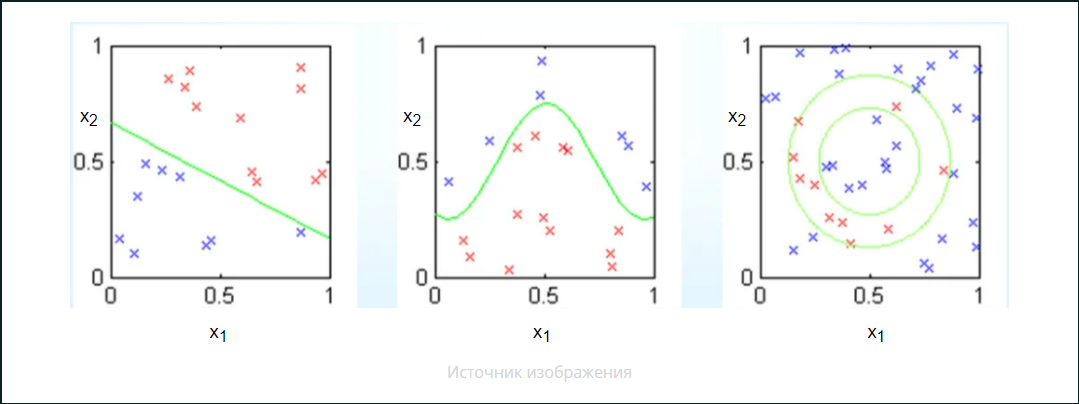

Модели, которые решают задачу классификации, называются **классификаторами (classifier).**

Если взять в качестве разделяющей поверхности некоторую плоскость (ровная поверхность на первом рисунке), то мы получаем модель логистической регрессии, которая тесно связана с рассмотренной нами ранее линейной регрессией.

Давайте для начала вспомним, как выглядит уравнение модели линейной регрессии в общем случае:

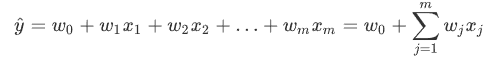

В общем случае это уравнение гиперплоскости, которая стремится приблизить зависимость целевой переменной от  факторов.

- Когда фактор всего один, уравнение задаёт прямую:



- Когда факторов два, уравнение задаёт плоскость:



→ Но всё это работает только в том случае, когда целевой признак , который мы хотим предсказать, является числовым, например цена, вес, время аренды и т. д.

Что же делать с этой моделью, когда целевой признак  является категориальным? Например, является письмо спамом или обычным письмом?

Можно предположить, что, раз у нас есть две категории, мы можем обозначить категории за **y=1** (Спам) и **y=0** (Не спам) и обучить линейную регрессию предсказывать 0 и 1.

Но результат будет очень плохим. Выглядеть это будет примерно так:

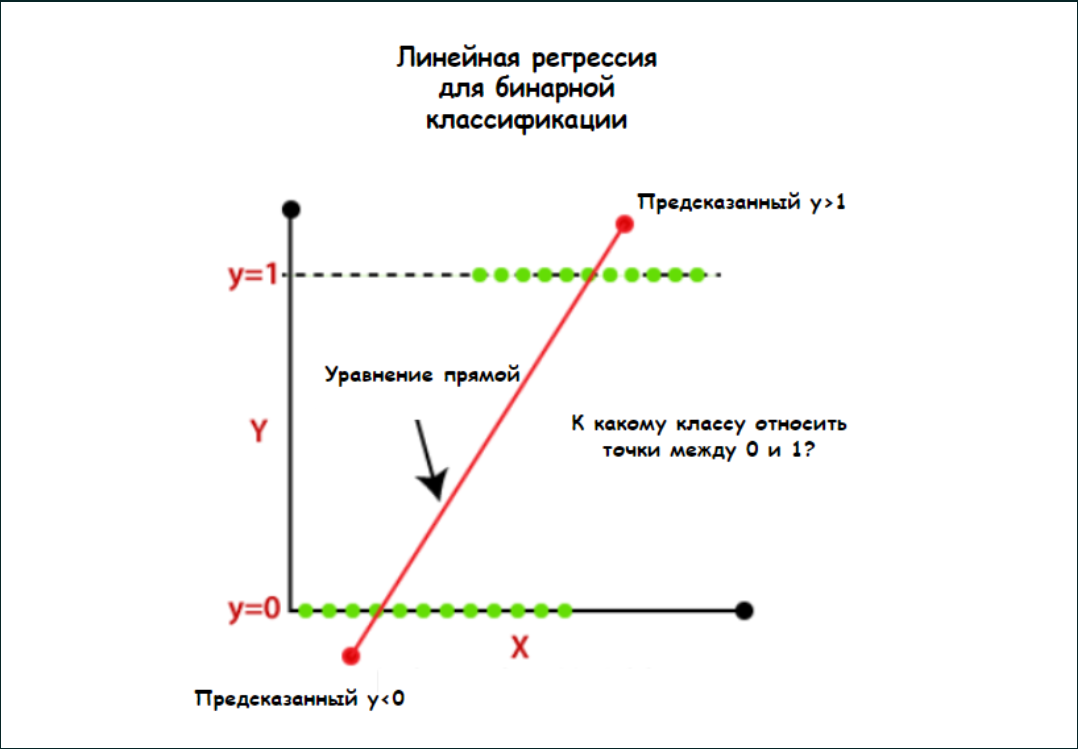

Для больших значений **x** прямая будет выдавать значения больше 1, а для очень маленьких — меньше 0. Что это значит? Непонятно. Непонятно и то, что делать со значениями в диапазоне от 0 до 1. Да, можно относить значения на прямой выше 0.5 к классу 1, а меньше либо равным 0.5 — к классу 0, но это всё «костыли».

Идея! Давайте переведём задачу классификации в задачу регрессии. Вместо предсказания класса будем предсказывать вероятность принадлежности к этому классу. 

Модель должна выдавать некоторую вероятность **P**, которая будет определять, принадлежит ли данный объект к классу 1: например, вероятность того, что письмо является спамом. При этом вероятность того, что письмо является обычным письмом (класс 0), определяется как **Q = 1- P**.

Когда модель будет обучена на предсказание вероятности, мы зададим некоторый порог вероятности. Если предсказанная вероятность будет выше этого порога, мы определим объект к классу 1, а если ниже — к классу 0.

Например, стандартный порог равен 0.5. То есть если вероятность P > 0.5, мы будем считать письмо спамом, а если  **P <= 0.5** — обычным информативным письмом.

В итоге мы добьёмся того, что будем предсказывать не дискретный категориальный, а непрерывный числовой признак, который лежит в диапазоне [0, 1]. А это уже знакомая нам задача регрессии.

→ Однако остался главный вопрос: как научить модель предсказывать вероятности, ведь они должны лежать строго в диапазоне от 0 до 1, а предсказания линейной регрессии лежат в диапазоне от **-ထ** до **+ထ** ? 

Тут-то мы и приходим к модели логистической регрессии — регрессии вероятностей.

## ОБЩЕЕ ПРЕДСТАВЛЕНИЕ О ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ

**Логистическая регрессия (Logistic Regression)** — одна из простейших моделей для решения задачи классификации. Несмотря на простоту, модель входит в топ часто используемых алгоритмов классификации в Data Science.

В основе логистической регрессии лежит логистическая функция (logistic function) **σ(z)** — отсюда и название модели. Однако более распространённое название этой функции — **сигмόида (sigmoid)**. Записывается она следующим образом:

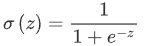

***Примечание. Здесь  — экспонента или число Эйлера. Это число является бесконечным, а его значение обычно принимают равным 2.718... Почитать о нём подробнее вы можете [здесь](https://dzen.ru/a/XKW4kcYE3AId802p).***

А вот график зависимости сигмоиды от аргумента **z**:

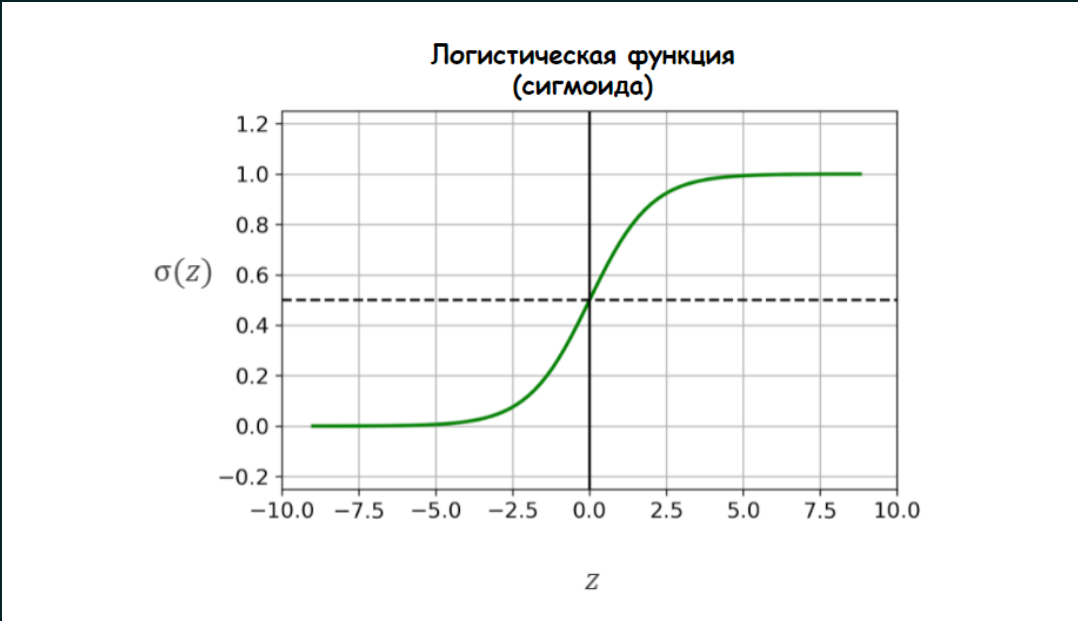

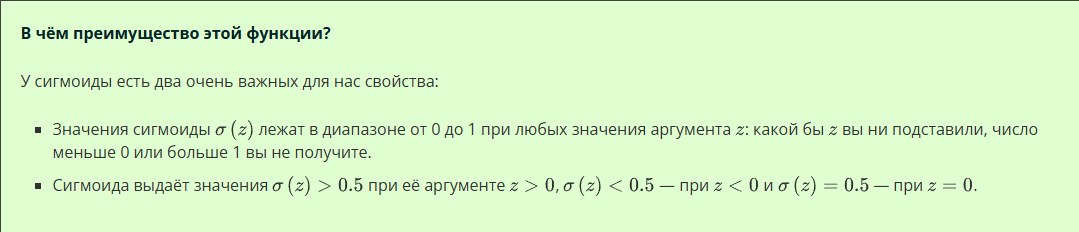

Это ведь и есть свойства вероятности! Выходом сигмоиды является число от 0 до 1, которое можно интерпретировать как вероятность принадлежности к классу 1. Её мы и пытаемся предсказать.

Основная идея модели логистической регрессии: возьмём модель линейной регрессии (обозначим её выход за **z**)

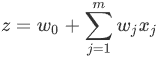

и подставим выход модели **z** в функцию сигмоиды, чтобы получить искомые оценки вероятности (в математике принято писать оценочные величины с «шапкой» наверху, а истинные значения — без «шапки», это чистая формальность):

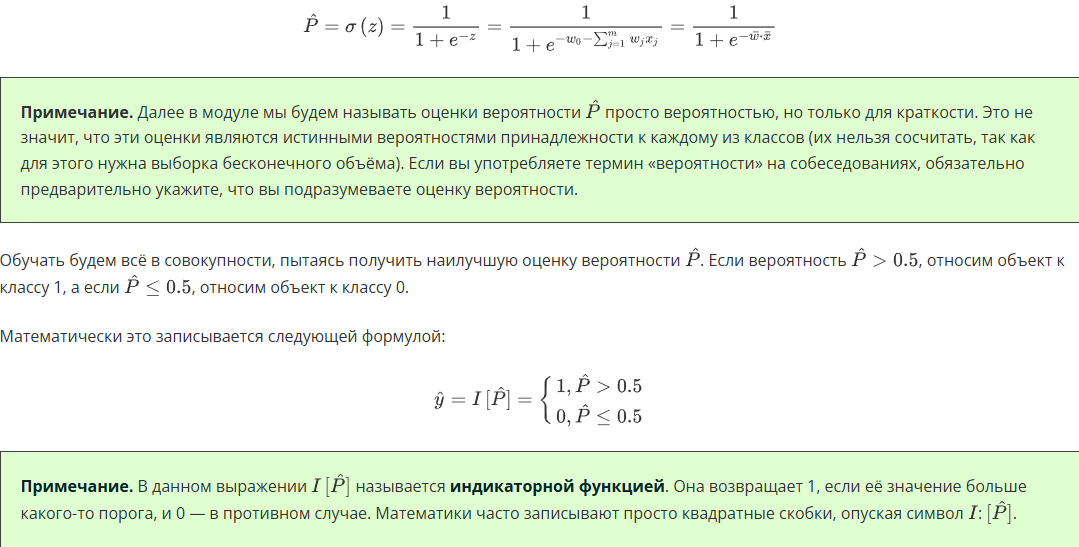

### Чего мы добились таким преобразованием?

Если мы обучим модель, то есть подберём  коэффициенты  (как их найти, обсудим чуть позже) таким образом, что для объектов класса 1 модель линейной регрессии начнёт выдавать положительное число, а для класса 0 — выдавать отрицательное число, то тогда, подставив предсказание линейной регрессии  в сигмоиду, мы сможем получать вероятности принадлежности к каждому из классов в диапазоне от 0 до 1.

Далее по порогу вероятности мы сможем определять, к какому классу принадлежит объект.

Это и есть наша цель. Мы свели задачу классификации к задаче регрессии для предсказания вероятностей. 

Для бинарной классификации описанное выше будет выглядеть следующим образом:

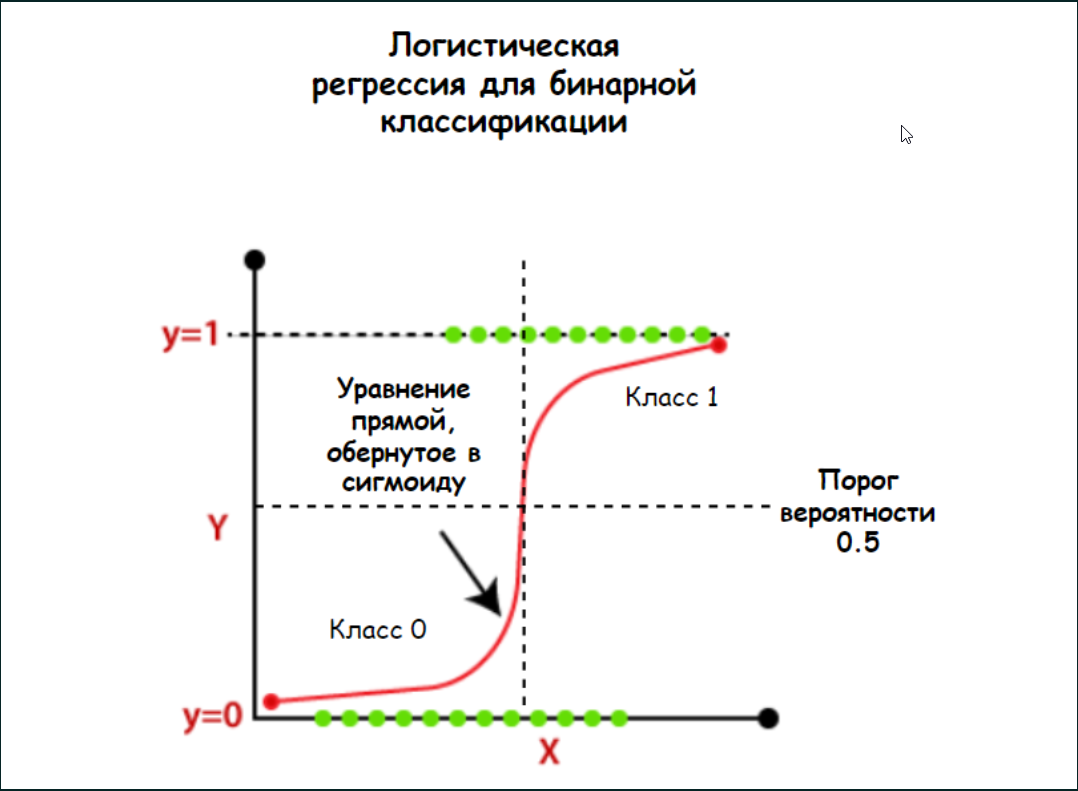

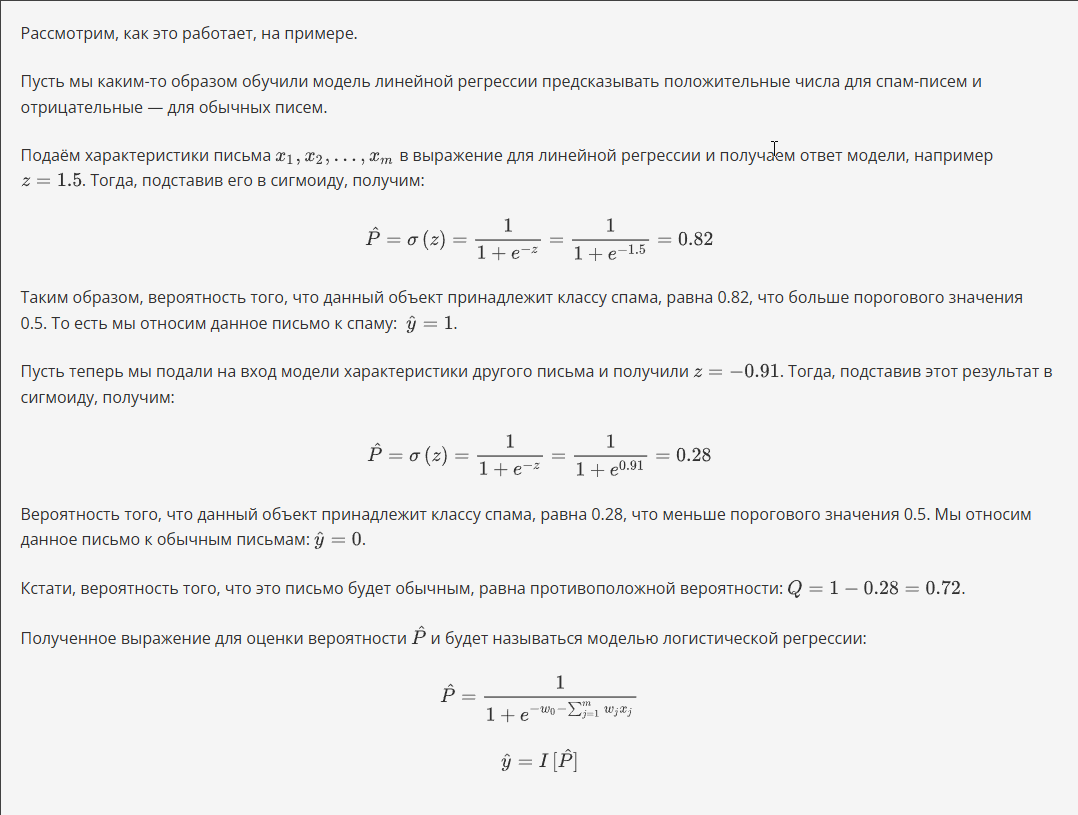



### Разберёмся с геометрией

Возьмём частный случай, когда класс объекта зависит от двух признаков — **x1** и **x2**.

Мы пытаемся предсказать поступление студента в аспирантуру в зависимости от результатов двух экзаменов. Целевой признак  — результат поступления (admission outcome) с двумя возможными значениями: поступил или не поступил. Факторы: **x1** — результат сдачи первого экзамена (Exam1 Score) и **x2** — результат сдачи второго (Exam 2 Score). Будем предсказывать вероятность поступления с помощью логистической регрессии.

Изобразим зависимость в пространстве двух факторов (вид сверху) в виде диаграммы рассеяния, а целевой признак отобразим в виде точек (непоступившие) и крестиков (поступившие).

Если рассматривать уравнение линейной регрессии отдельно от сигмоиды, то геометрически построить логистическую регрессию на основе двух факторов — значит найти такие коэффициенты **w1,w2 и w3** уравнения плоскости, при которых наблюдается наилучшее разделение пространства на две части.

**z = w0 + w1x1 + w2x2**

Тогда выражение для **z** будет задавать в таком пространстве плоскость (в проекции вида сверху — прямую), которая разделяет всё пространство на две части. Над прямой вероятность поступления будет **>0.5**, а под прямой **<0.5**:

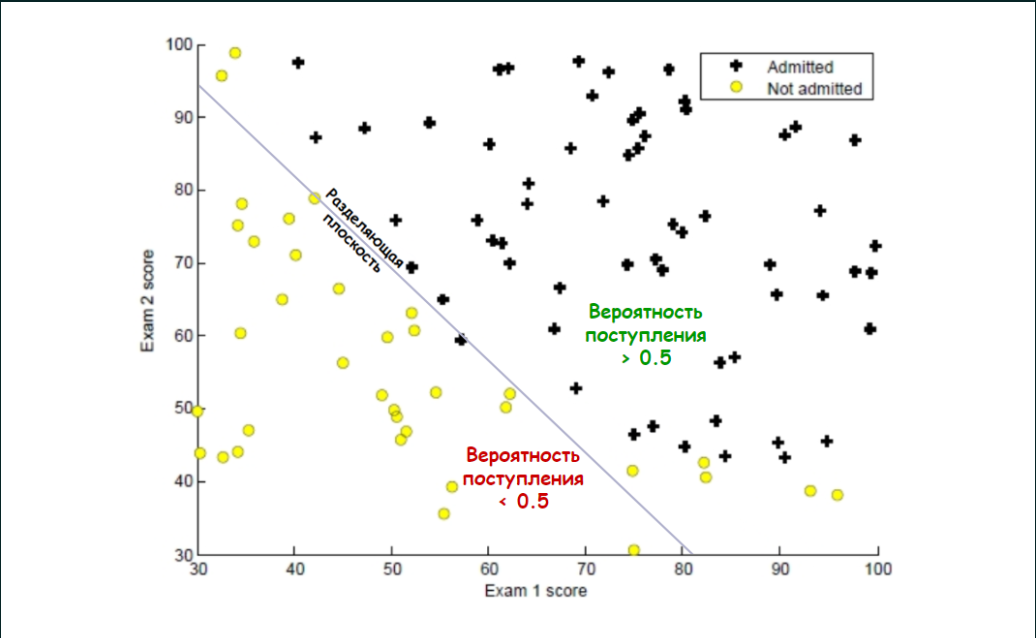

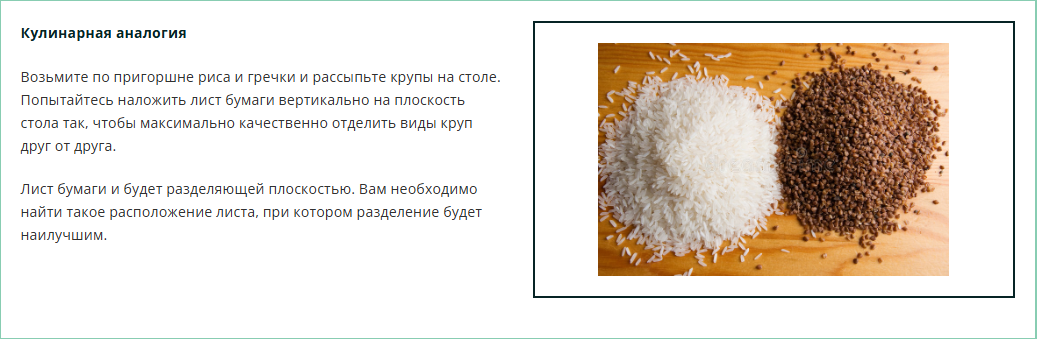

Коэффициенты построенной выше плоскости равны (как их найти, обсудим позже):

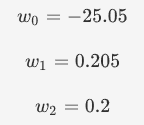

Тогда модель логистической регрессии будет иметь вид:

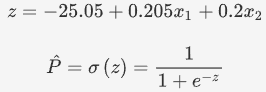

Появляется новый абитуриент, и мы хотим предсказать вероятность его поступления. Баллы студента: **x1 = 67**, **x2 = 53**. Заметьте, что точка с такими координатами находится ниже нашей плоскости (то есть абитуриент, скорее всего, не поступит).

Тогда:

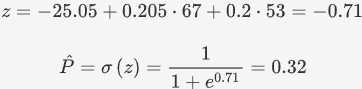

Итак, оценка вероятности поступления студента составляет 0.32, то есть его шанс поступления составляет 32 %.

А что если мы возьмём точку, лежащую выше прямой?

Например, появился абитуриент с баллами **x1 = 80**, **x2 = 75**. Подставим его баллы в нашу модель логистической регрессии, чтобы понять, какова оценочная вероятность поступления:

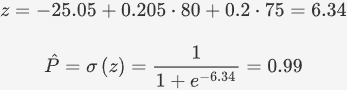

Таким образом, оценка вероятности поступления абитуриента составляет 0.99, шанс поступления — 99 %.

### В чём математический секрет?

Математически подстановка в уравнение плоскости точки, которая не принадлежит ей (находится ниже или выше), означает вычисление расстояния от этой точки до плоскости.

- Если точка находится ниже плоскости, расстояние будет отрицательным (**z < 0**).
- Если точка находится выше плоскости, расстояние будет положительным (**z > 0**).
- Если точка находится на самой плоскости, **z = 0**.

Мы знаем, что подстановка отрицательных чисел в сигмоиду приведёт к вероятности **P^ < 0.5**, а постановка положительных — к вероятности **P^ > 0.5**. 

Таким образом, ключевым моментом в предсказании логистической регрессии является расстояние от точки до разделяющей плоскости в пространстве факторов. Это расстояние в литературе часто называется **отступом (margin)**. 

В этом и состоит секрет работы логистической регрессии.

Чем больше расстояние от точки, находящейся выше разделяющей плоскости, до самой плоскости, тем больше оценка вероятности принадлежности к классу 1.

Попробуйте подставить различные координаты точек в модель логистической регрессии и убедитесь в этом.

Можно построить тепловую карту, которая показывает, чему равны вероятности в каждой точке пространства:

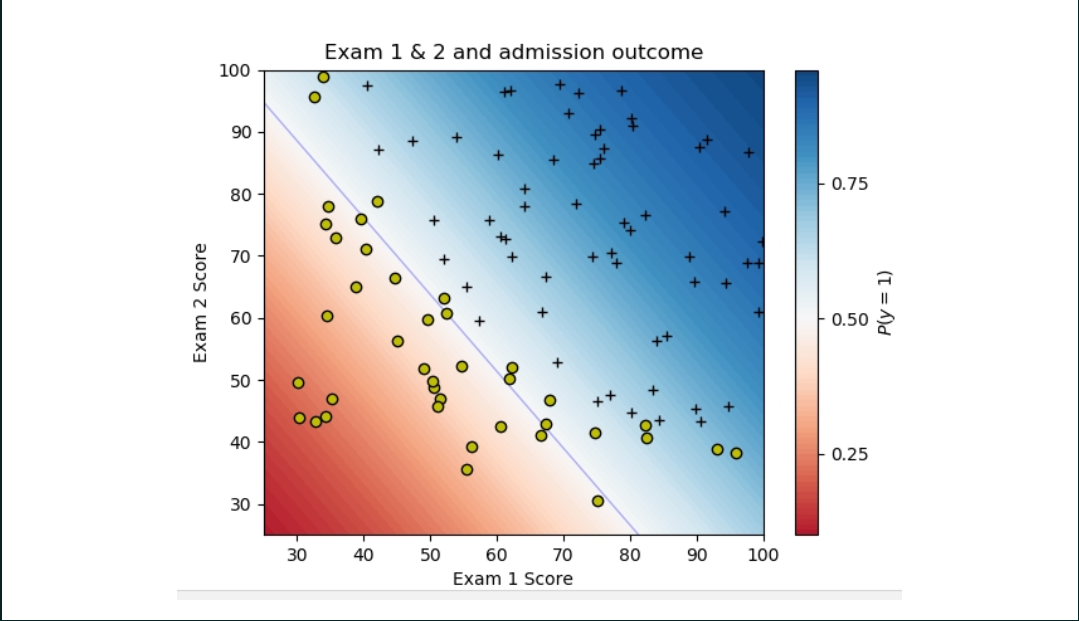

На рисунке точки, которые относятся к классу непоступивших абитуриентов, лежащие ниже разделяющей плоскости, находятся в красной зоне. Чем насыщеннее красный цвет, тем ниже вероятность того, что абитуриент поступит в аспирантуру. И наоборот, точки, которые относятся к классу поступивших абитуриентов, лежащие выше разделяющей плоскости, находятся в синей зоне. Чем насыщеннее синий цвет, тем выше вероятность того, что абитуриент поступит в аспирантуру.

Для случая зависимости целевого признака **y** от трёх факторов **x1, x2 и x3**, например от баллов за два экзамена и рейтинга университета, из которого выпустился абитуриент, выражение для  будет иметь вид:

**z = w0 + w1x1 + w2x2 + w3x3**

Уравнение задаёт плоскость в четырёхмерном пространстве. Но если вспомнить, что **y** — категориальный признак и классы можно обозначить цветом, то получится перейти в трёхмерное пространство. Разделяющая плоскость будет выглядеть следующим образом:

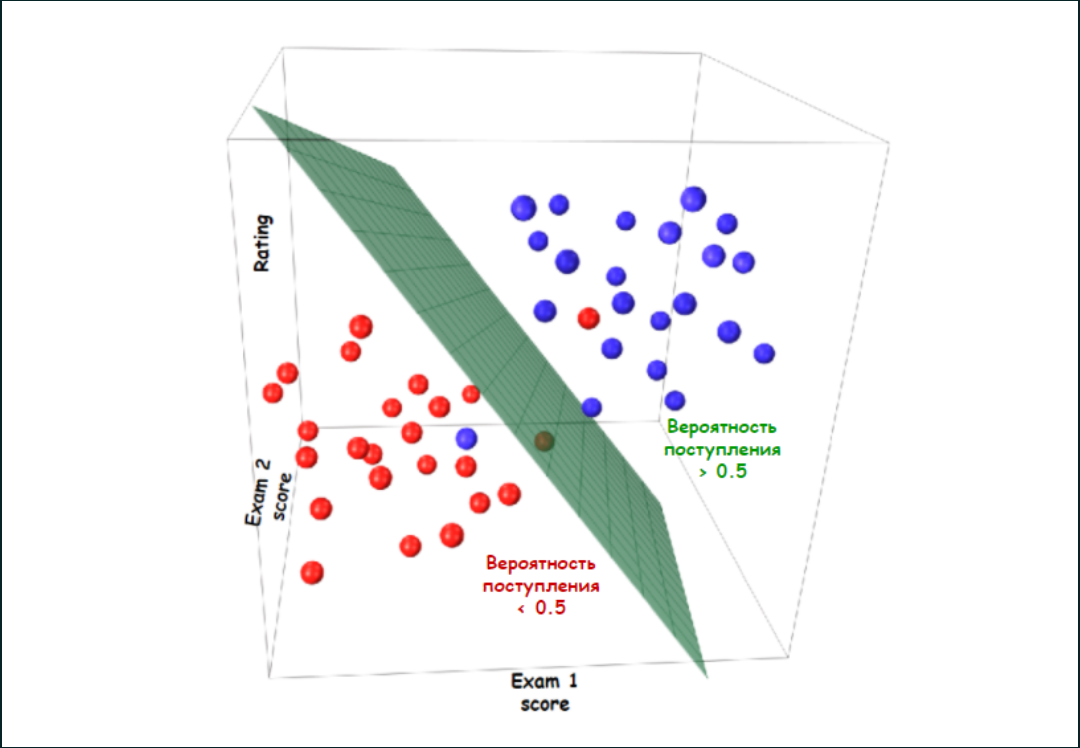

В общем случае, когда у нас есть зависимость от  факторов, линейное выражение, находящееся под сигмоидой, будет обозначать **разделяющую гиперплоскость**.

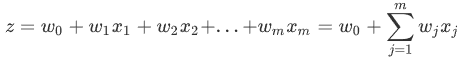

### Задание 2.1

Совместите описания с подходящим им графиком.

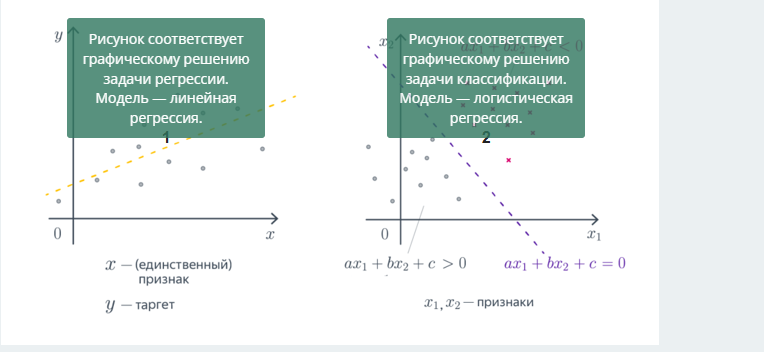

### Задание 2.2

Какие из этих выборок линейно разделимы? Красными точками обозначены объекты класса 0, синими — класса 1.

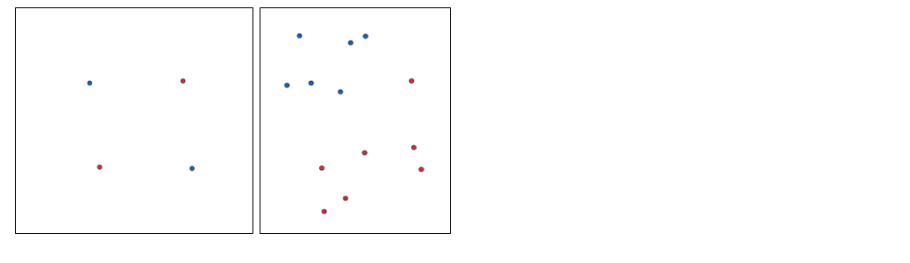

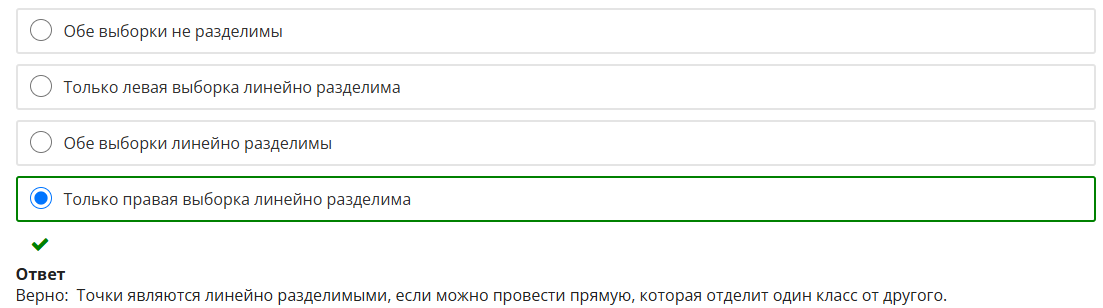

### Задание 2.3

Почему линейная регрессия плохо подходит для решения задачи классификации на два класса: класс 0 и класс 1?

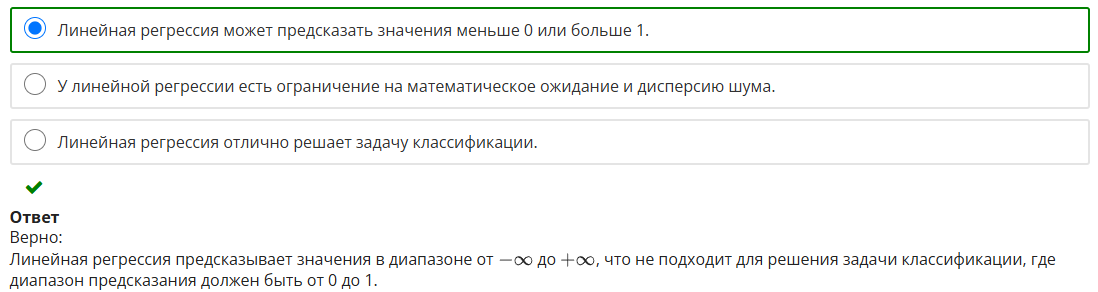

### Задание 2.4

Зачем мы производим логистическое преобразование выхода модели линейной регрессии?

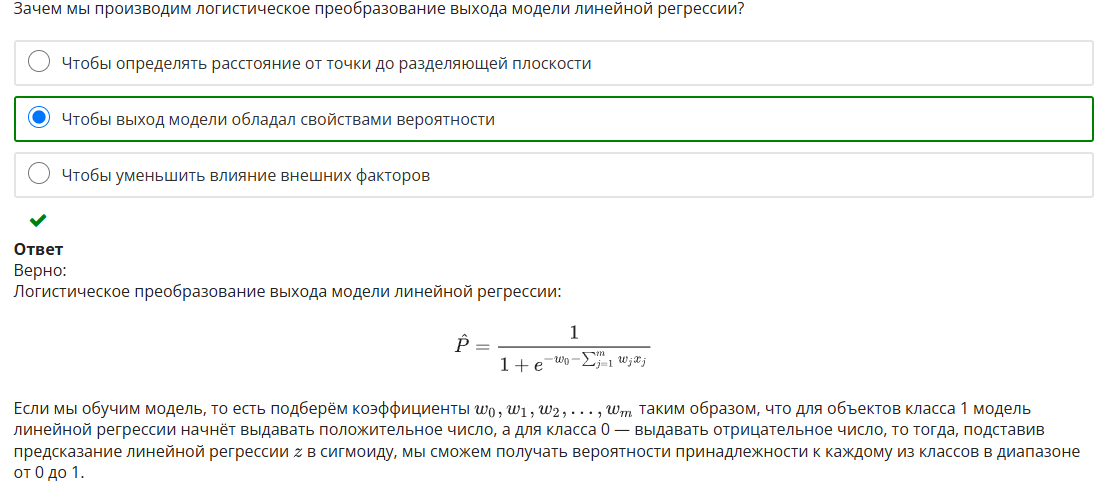

### Задание 2.5

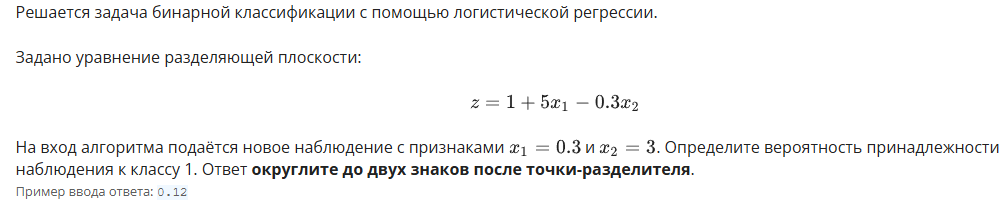

In [5]:
x1 = 0.3
x2 = 3
z = 1 + 5*x1 - 0.3*x2
e = 2.71828
P = 1/(1+e**(-z))
print(round(P,2))

0.83


## ПОИСК ПАРАМЕТРОВ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ

Итак, мы разобрались с тем, как выглядит модель логистической регрессии и что она означает в геометрическом смысле.

Но остался один главный вопрос: как найти такие коэффициенты **w = (w0, w1, w2,..., wm)**, чтобы гиперплоскость разделяла пространство наилучшим образом?

Вновь обратимся к нашей схеме минимизации эмпирического риска:

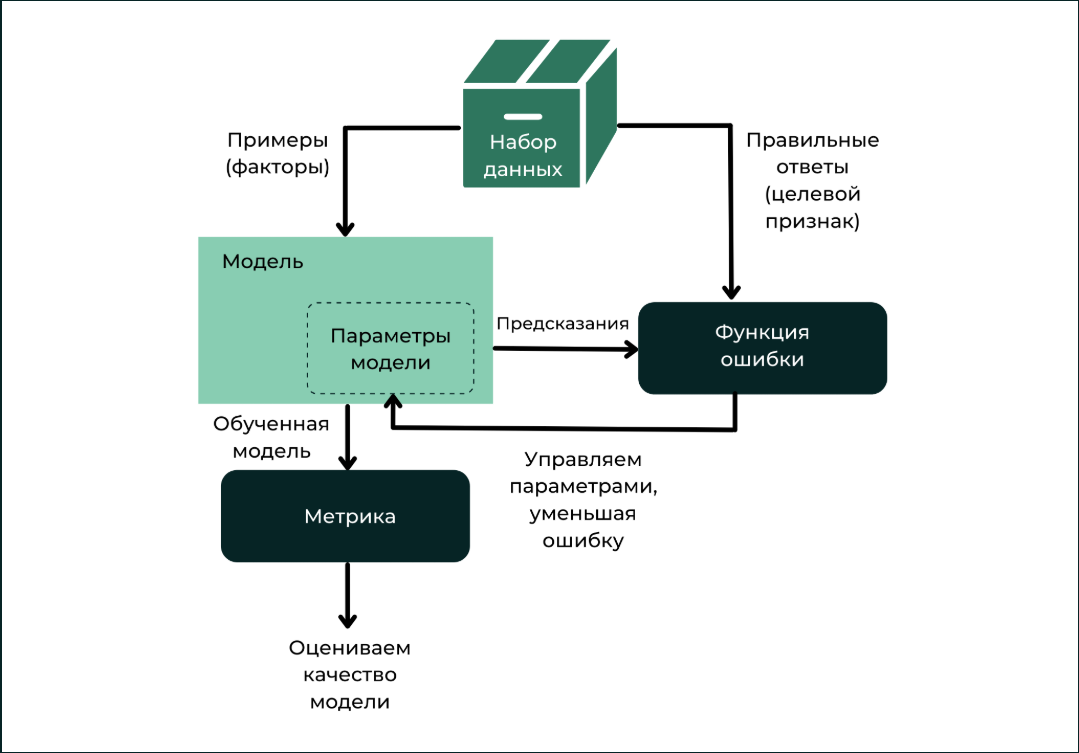

Можно предположить, что стоит использовать метод наименьших квадратов. Введём функцию ошибки — средний квадрат разности MSE между истинными классами **y** и предсказанными классами **y^** и попытаемся его минимизировать.

Сразу можно достоверно предсказать, что результат такого решения будет плохим, поэтому воздержимся от его использования.

Здесь нужен другой подход. Это метод максимального правдоподобия (Maximum Likelihood Estimation — MLE). 

**Правдоподобие** — это оценка того, насколько вероятно получить истинное значение целевой переменной  при данных  и параметрах **w**. 

Данный метод позволяет получить функцию правдоподобия.

**Цель метода** — найти такие параметры **w = (w0, w1, w2,..., wm)**, в которых наблюдается максимум функции правдоподобия. Подробнее о выводе формулы вы можете прочитать [здесь.](https://habr.com/ru/articles/485872/)

А мы пока что опустим математические детали метода и приведём только конечную формулу:

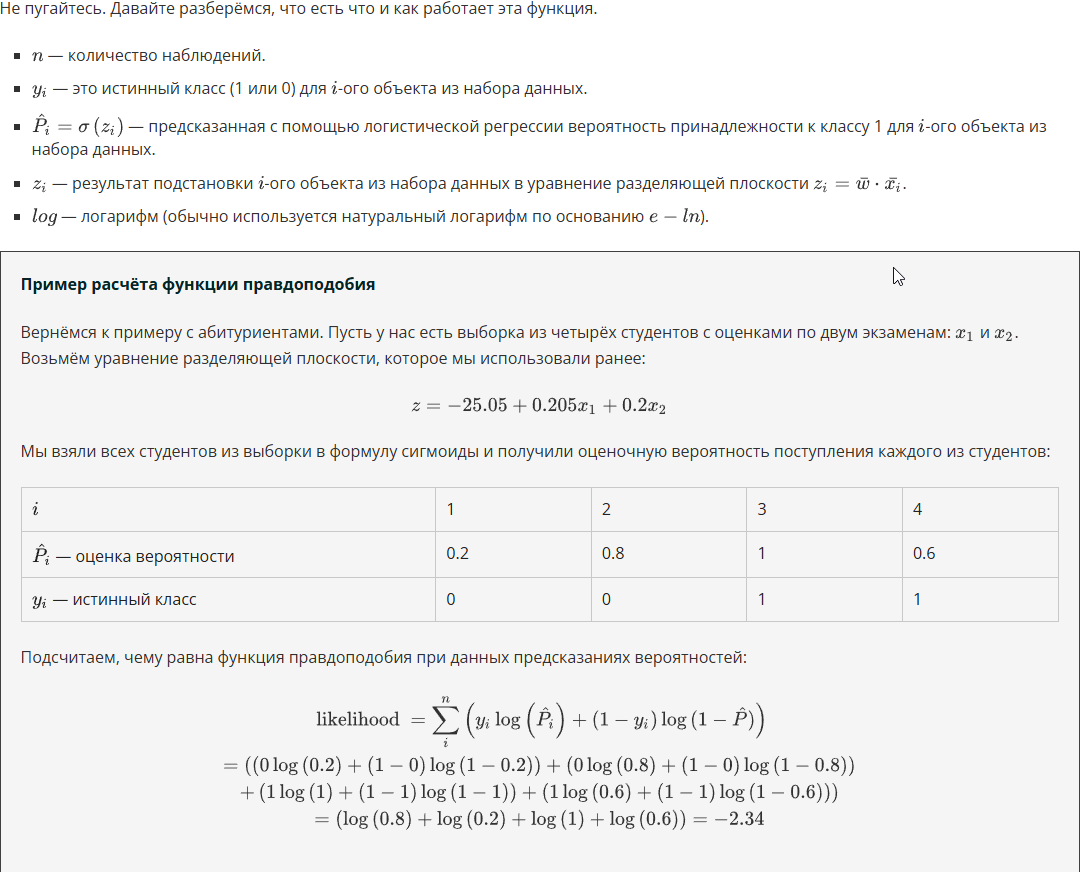

Такие расчёты можно производить для любых значений параметров, меняется только оценка вероятности **Pi^**.

**Примечание**. К сожалению, функция likelihood не имеет интерпретации, то есть нельзя сказать, что значит число -2.34 в контексте правдоподобия.

Цель — найти такие параметры, при которых наблюдается максимум этой функции.

Теперь пора снова применить магию математики, чтобы привести задачу к привычному нам формату минимизации эмпирического риска. По правилам оптимизации, если поставить перед функцией минус, то задача оптимизации меняется на противоположную: был поиск максимума — станет поиском минимума.

Таким образом мы получим функцию потерь **L(w)**, которая носит название **«функция логистических потерь»**, или **logloss**. Также часто можно встретить название **кросс-энтропия**, или **cross-entropy loss**:

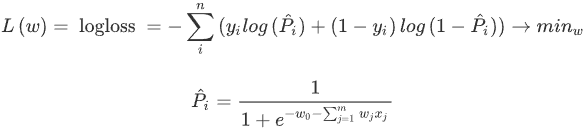

Вот эту функцию мы и будем минимизировать в рамках поиска параметров логистической регрессии. Мы должны найти такие параметры разделяющей плоскости **w** , при которых наблюдается минимум *logloss*.

Знакомая задача? Всё то же самое, что и с линейной регрессией, только функция ошибки другая.

→ К сожалению, для такой функции потерь аналитическое решение оптимизационной задачи найти не получится: при расчётах получается, что его попросту не существует.

Но мы помним, что, помимо аналитических решений, есть и численные.

Например, для поиска параметров можно использовать знакомый нам градиентный спуск. Вспомним, как выглядит итерационная формула данного метода:

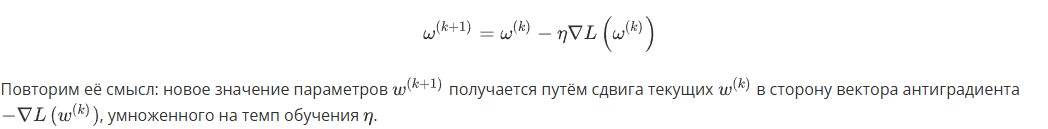

Математическую реализацию вычисления градиента для *logloss* мы обсудим далее в курсе, а пока нас интересует исключительно его смысл.

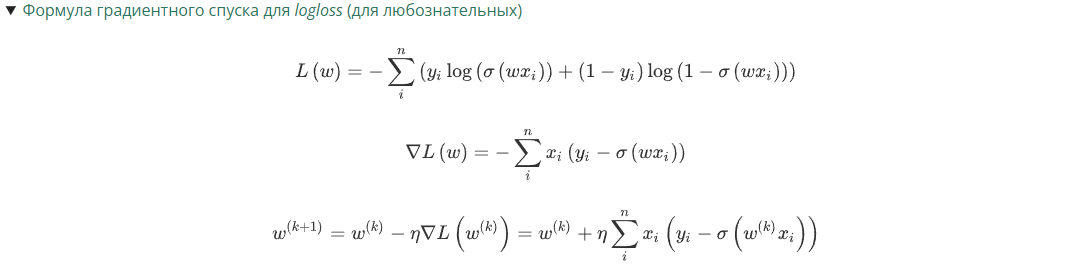

Мы уже знаем, что для того, чтобы повысить шанс пройти мимо локальных минимумов функции потерь, используется не сам градиентный спуск, а его модификации: например, можно использовать уже знакомый нам стохастический градиентный спуск (SGD).

Помним, что применение градиентного спуска требует предварительного масштабирования данных (стандартизации/нормализации). В реализации логистической регрессии в sklearn предусмотрено ещё несколько методов оптимизации, для которых масштабирование не обязательно. О них мы упомянем в практической части модуля.

Во избежание переобучения модели в функцию потерь логистической регрессии традиционно добавляется **регуляризация**. В реализации логистической регрессии в sklearn она немного отличается от той, что мы видели ранее для линейной регрессии.

При L1-регуляризации мы добавляем в функцию потерь **L(w)** штраф из суммы модулей параметров, а саму функцию logloss умножаем на коэффициент **C**:

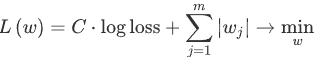

А при *L2-регуляризации* — штраф из суммы квадратов параметров:

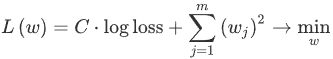

Значение коэффициента **C** — коэффициент, обратный коэффициенту регуляризации. Чем больше **C**, тем меньше «сила» регуляризации.

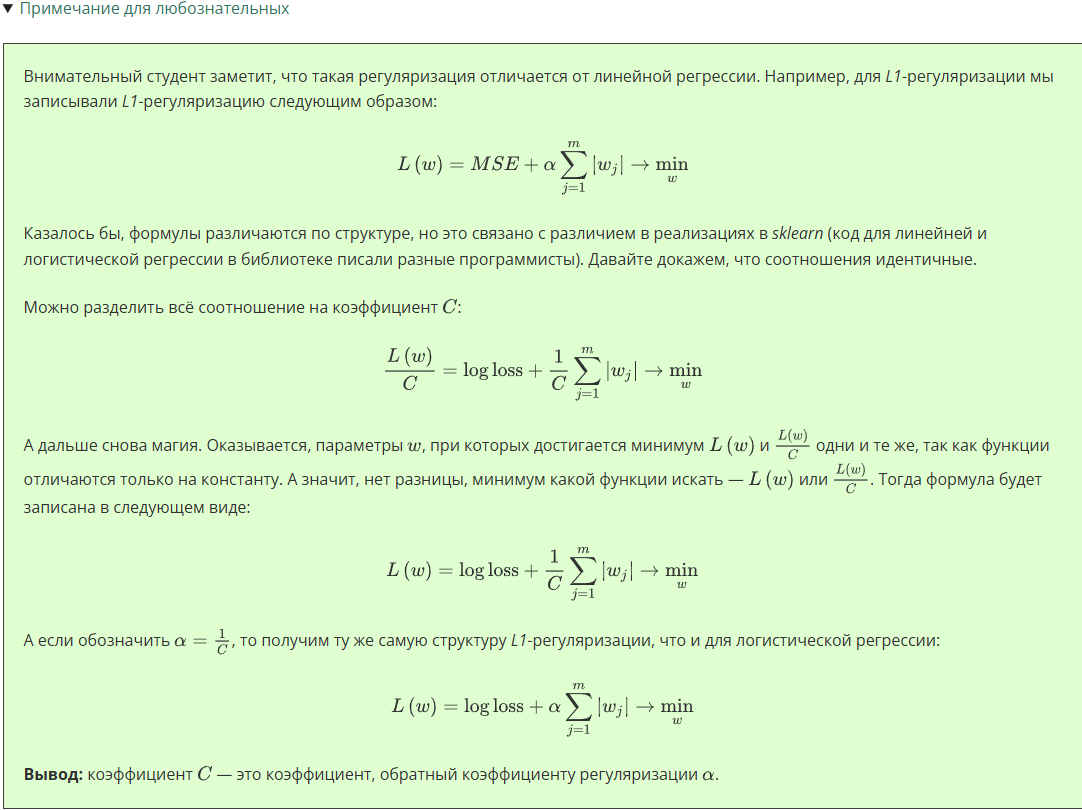

Предлагаем вам посмотреть на то, как будет меняться форма сигмоиды, разделяющей плоскости при минимизации функции потерь *logloss* (она обозначена как *cross-entropy* в виде концентрических кругов — вид сверху), с помощью обычного градиентного спуска (не стохастического) в виде анимации.


Не волнуйтесь, все громоздкие формулы уже реализованы в классических библиотеках, таких как sklearn. Но нам важно понимать принцип того, что происходит «под капотом», чтобы верно интерпретировать результат и по возможности управлять им.

Теперь давайте перейдём к практической реализации логистической регрессии и решим с её помощью задачу классификации. Но предварительно закрепим теоретический материал ↓

### Задание 2.6

Из какого метода выводится выражение для функции потерь в логистической регрессии?

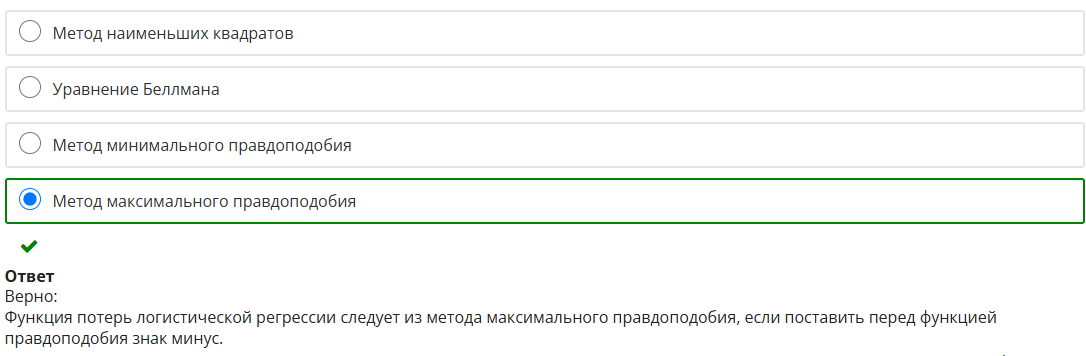

### Задание 2.7

Как называется функция потерь, которая минимизируется при обучении логистической регрессии?

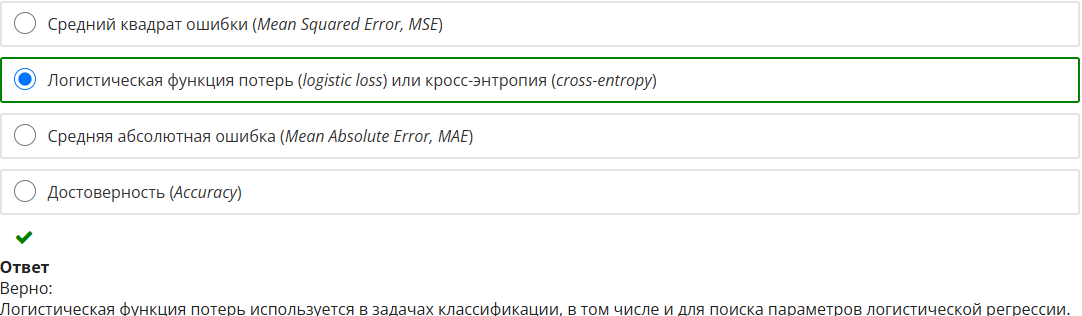